In [1]:
from greensight.utils import DIR_DATA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ppscore as pps
from greensight.reports import save_figure

In [ ]:
from greensight.indices import INDEX_NAMES

from greensight.utils import DIR_ROOT

# DIR_REPORT_FIGS = DIR_ROOT / "documents/reports/correlation_reports/2025-02-18/figs"
DIR_REPORT_FIGS = DIR_ROOT / "documents/reports/correlation_reports_droppedna/2025-02-18/figs"

if not DIR_REPORT_FIGS.is_dir():
    DIR_REPORT_FIGS.mkdir(parents=True)

assert DIR_REPORT_FIGS.is_dir()

In [5]:
path_in = DIR_DATA / "processed_data/data_all_droppedna.hdf"
# path_in = DIR_DATA / "processed_data/data_all.hdf"
df = pd.read_parquet(path_in)
df.head(5)

greenbelt  Bath and Bristol                                              \
band                   soil vegetation      VHAsc      VHDes      VVAsc   
2017-04-01        20.513539   0.867165 -18.399888 -22.760538 -12.631246   
2017-05-01        20.547113   0.877612 -18.302422 -22.184896 -12.572460   
2017-09-01        20.649851   0.911486 -17.745374 -22.256628 -11.557331   
2017-11-01        20.615543   0.889503 -17.621355 -21.946526 -11.500672   
2017-12-01        20.581941   0.878316 -17.211707 -21.379319 -11.095954   

greenbelt                                                                ...  \
band            VVDes          B1          B11          B12          B2  ...   
2017-04-01 -18.038478  249.901535  1972.478632  1085.123853  334.255209  ...   
2017-05-01 -17.411590  211.897609  1967.190929  1038.574691  308.149490  ...   
2017-09-01 -16.836486  281.561435  1960.528019  1053.099649  383.504764  ...   
2017-11-01 -16.543376  211.799001  1465.525920   801.062591  229.219648  ...   
2017-12-01 -15.978795  522.133421  1308.676641   770.335474  623.400825  ...   

greenbelt       York                                                         \
band           pssra          pvi      reip         ri        rvi     s2rep   
2017-04-01 -0.141257  2532.172821  0.282387   3.785372   3.785372  0.141257   
2017-05-01 -0.316820  3628.512919  0.539644  29.171322  29.171322  0.316820   
2017-09-01 -0.131380  2728.550289  0.377027   8.535704   8.535704  0.131380   
2017-11-01 -0.158886  2409.768786  0.411240  35.524975  35.524975  0.158886   
2017-12-01 -0.248480  2109.689480  0.300107   4.584171   4.584171  0.248480   

greenbelt                                              
band            savi     tndvi     tsavi         wdvi  
2017-04-01  0.635326  0.423597  0.423584  2544.802191  
2017-05-01  1.129914  0.753353  0.753331  3646.610352  
2017-09-01  0.870417  0.580357  0.580334  2742.159103  
2017-11-01  1.007005  0.671468  0.671430  2421.787658  
2017-12-01  0.768348  0.512330  0.512302  2120.211687  

[5 rows x 768 columns]

In [6]:
df["Bath and Bristol"].head(5)

band,soil,vegetation,VHAsc,VHDes,VVAsc,VVDes,B1,B11,B12,B2,...,pssra,pvi,reip,ri,rvi,s2rep,savi,tndvi,tsavi,wdvi
2017-04-01,20.513539,0.867165,-18.399888,-22.760538,-12.631246,-18.038478,249.901535,1972.478632,1085.123853,334.255209,...,-0.320715,3960.440437,0.529283,20.083527,20.083527,0.320715,1.149973,0.766729,0.766706,3980.193379
2017-05-01,20.547113,0.877612,-18.302422,-22.184896,-12.572460,-17.411590,211.897609,1967.190929,1038.574691,308.149490,...,-0.348638,4140.381343,0.542042,14.961010,14.961010,0.348638,1.172601,0.781803,0.781783,4161.031753
2017-09-01,20.649851,0.911486,-17.745374,-22.256628,-11.557331,-16.836486,281.561435,1960.528019,1053.099649,383.504764,...,-0.283521,3613.485660,0.492569,10.740188,10.740188,0.283521,1.089795,0.726604,0.726583,3631.508144
2017-11-01,20.615543,0.889503,-17.621355,-21.946526,-11.500672,-16.543376,211.799001,1465.525920,801.062591,229.219648,...,-0.265774,2797.883532,0.482151,56.290396,56.290396,0.265774,1.160914,0.774064,0.774029,2811.838150
2017-12-01,20.581941,0.878316,-17.211707,-21.379319,-11.095954,-15.978795,522.133421,1308.676641,770.335474,623.400825,...,-0.293181,2595.580242,0.393070,12.730409,12.730409,0.293181,0.956617,0.637860,0.637827,2608.525860


In [7]:
print("Missing data: {:.2f}%".format(100*(df == 0.).sum().sum()/(np.prod(df.shape))))

Missing data: 1.50%


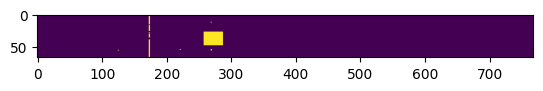

In [8]:
plt.imshow((df==0.))

In [9]:
df.replace(0.0, np.nan, inplace=True)
assert df.isna().any().any() == True 
assert (df == 0.0).any().any() == False

In [14]:
# df_interp = df.interpolate(method='linear', limit_direction='forward', axis=0)
df_interp = df.dropna(axis=1)

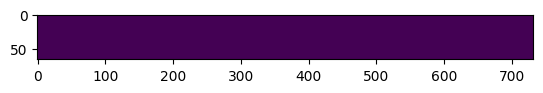

In [15]:
plt.imshow((df_interp.isna()))

In [16]:
df_interp = df_interp.fillna(method="backfill")

/tmp/ipykernel_350211/2912079541.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interp = df_interp.fillna(method="backfill")


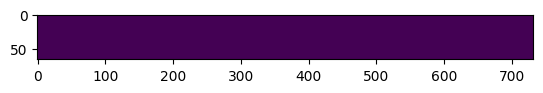

In [17]:
plt.imshow((df_interp.isna()))

In [18]:
df_interp

greenbelt  Bath and Bristol                                              \
band                   soil vegetation      VHAsc      VHDes      VVAsc   
2017-04-01        20.513539   0.867165 -18.399888 -22.760538 -12.631246   
2017-05-01        20.547113   0.877612 -18.302422 -22.184896 -12.572460   
2017-09-01        20.649851   0.911486 -17.745374 -22.256628 -11.557331   
2017-11-01        20.615543   0.889503 -17.621355 -21.946526 -11.500672   
2017-12-01        20.581941   0.878316 -17.211707 -21.379319 -11.095954   
...                     ...        ...        ...        ...        ...   
2023-04-01        20.454493   0.858732 -17.499593 -18.537119 -11.395785   
2023-05-01        20.480581   0.874470 -18.430825 -18.557014 -12.407633   
2023-06-01        20.547749   0.890474 -18.225108 -18.402488 -12.267160   
2023-09-01        20.568847   0.913536 -18.216297 -18.378292 -11.603202   
2023-11-01        20.494722   0.895839 -17.721905 -17.007086 -11.151742   

greenbelt                                                                ...  \
band            VVDes          B1          B11          B12          B2  ...   
2017-04-01 -18.038478  249.901535  1972.478632  1085.123853  334.255209  ...   
2017-05-01 -17.411590  211.897609  1967.190929  1038.574691  308.149490  ...   
2017-09-01 -16.836486  281.561435  1960.528019  1053.099649  383.504764  ...   
2017-11-01 -16.543376  211.799001  1465.525920   801.062591  229.219648  ...   
2017-12-01 -15.978795  522.133421  1308.676641   770.335474  623.400825  ...   
...               ...         ...          ...          ...         ...  ...   
2023-04-01 -12.029402  303.838218  1855.116418  1031.051968  339.596551  ...   
2023-05-01 -12.283633  389.663520  1949.054027  1072.828146  449.119600  ...   
2023-06-01 -12.282438  372.140040  2217.952110  1240.471543  457.551071  ...   
2023-09-01 -11.652088  367.286057  2151.105350  1200.017345  469.735121  ...   
2023-11-01 -10.561257  159.406392  1481.119067   823.615632  274.883669  ...   

greenbelt       York                                                         \
band           pssra          pvi      reip         ri        rvi     s2rep   
2017-04-01 -0.141257  2532.172821  0.282387   3.785372   3.785372  0.141257   
2017-05-01 -0.316820  3628.512919  0.539644  29.171322  29.171322  0.316820   
2017-09-01 -0.131380  2728.550289  0.377027   8.535704   8.535704  0.131380   
2017-11-01 -0.158886  2409.768786  0.411240  35.524975  35.524975  0.158886   
2017-12-01 -0.248480  2109.689480  0.300107   4.584171   4.584171  0.248480   
...              ...          ...       ...        ...        ...       ...   
2023-04-01 -0.231887  3024.029664  0.459947   7.866742   7.866742  0.231887   
2023-05-01 -0.359710  4095.091430  0.547680  10.864185  10.864185  0.359710   
2023-06-01 -0.334888  3972.489558  0.522914  10.010770  10.010770  0.334888   
2023-09-01 -0.109655  2876.646591  0.369523   5.593981   5.593981  0.109655   
2023-11-01 -0.192424  2296.166714  0.369096   6.531642   6.531642  0.192424   

greenbelt                                              
band            savi     tndvi     tsavi         wdvi  
2017-04-01  0.635326  0.423597  0.423584  2544.802191  
2017-05-01  1.129914  0.753353  0.753331  3646.610352  
2017-09-01  0.870417  0.580357  0.580334  2742.159103  
2017-11-01  1.007005  0.671468  0.671430  2421.787658  
2017-12-01  0.768348  0.512330  0.512302  2120.211687  
...              ...       ...       ...          ...  
2023-04-01  0.988980  0.659399  0.659376  3039.112200  
2023-05-01  1.115325  0.743617  0.743598  4115.515953  
2023-06-01  1.094420  0.729680  0.729661  3992.302596  
2023-09-01  0.815699  0.543866  0.543847  2890.994045  
2023-11-01  0.912062  0.608147  0.608117  2307.618989  

[66 rows x 732 columns]

In [19]:
greenbelts = set([i[0] for i in df.columns])
greenbelts

{'Bath and Bristol',
 'Birmingham',
 'Blackpool',
 'Burton upon Trent and Swadlincote',
 'Cambridge',
 'Carnforth Lancaster and Morecambe',
 'Cheltenham and Gloucester',
 'Derby and Nottingham',
 'London',
 'Merseyside and Greater Manchester',
 'Oxford',
 'South West Hampshire',
 'South and West Yorkshire',
 'Stoke on Trent',
 'Tyne and Wear',
 'York'}

In [36]:

cols = [df_interp[gb].columns for gb in list(greenbelts)[1:]]

common_cols = cols[0]
for arr in cols[1:]:
    common_cols = np.intersect1d(common_cols, arr)

common_cols

array(['B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
       'B8A', 'B9', 'VHAsc', 'VHDes', 'VVAsc', 'VVDes', 'arvi', 'bi',
       'bi2', 'ci', 'dvi', 'gemi', 'gndvi', 'ipvi', 'ireci', 'mcari',
       'mndwi', 'mtci', 'ndi45', 'ndpi', 'ndti', 'ndvi', 'ndwi', 'ndwi2',
       'pssra', 'pvi', 'reip', 'ri', 'rvi', 's2rep', 'savi', 'soil',
       'tndvi', 'tsavi', 'vegetation', 'wdvi'], dtype=object)

In [37]:
DF = []
corr = []
for i, gb in enumerate(list(greenbelts)[1:]):
    df_gb = df_interp[gb][common_cols]

    df_gb = df_gb[[i for i in df_gb.columns if i not in ["soil", "vegetation"]] + ["soil", "vegetation"]]
    # df_normalized = (df_gb - df_gb.min()) / (df_gb.max() - df_gb.min())

    DF.append(df_gb)
    c = df_gb.corr()[:2].T[2:]
    corr.append(c.values)

# DF = np.array(DF)
corr = np.stack(corr, 0)

In [39]:
def compute_pps_matrix(df):
    p = pps.matrix(df)
    p_matrix = p.pivot(index='x', columns='y', values='ppscore')
    return p_matrix

def compute_cor_matrix(df):
    df = df[[i for i in sorted(df.columns) if i not in ("soil", "vegetation")]+ ["soil", "vegetation"] ] 
    return df.corr(method="pearson")

In [40]:
pps_mats = [compute_pps_matrix(df) for df in DF]

In [48]:
cor_mats = [compute_cor_matrix(df) for df in DF]


In [49]:
pps_mat_mean = pd.concat(pps_mats).groupby(level=0).mean()
pps_mat_max = pd.concat(pps_mats).groupby(level=0).max()

cor_mat_mean = pd.concat(cor_mats).groupby(level=0).apply(lambda x: np.mean(abs(x), axis=0))
cor_mat_max = pd.concat(cor_mats).groupby(level=0).apply(lambda x: np.max(abs(x), axis=0))

cor_mat_mean = cor_mat_mean.loc[cor_mat_mean.columns]
cor_mat_max = cor_mat_max.loc[cor_mat_max.columns]

pps_mat_mean = pps_mat_mean.loc[cor_mat_mean.index, cor_mat_mean.columns]
pps_mat_max = pps_mat_max.loc[cor_mat_max.index, cor_mat_max.columns]

PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/appendix_00_full_pcc_matrix_mean.png')

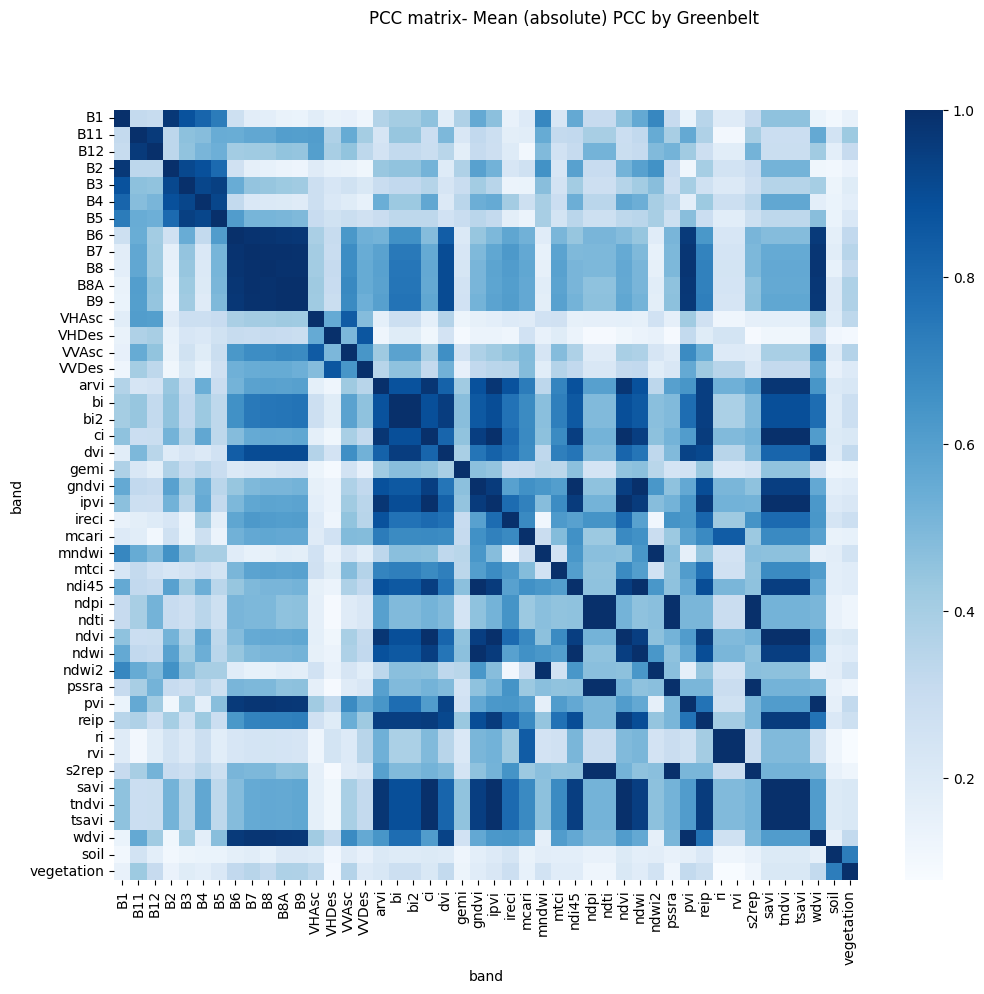

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cor_mat_mean.abs(), cmap="Blues", ax=ax)
fig.suptitle("PCC matrix- Mean (absolute) PCC by Greenbelt")

save_figure(fig, DIR_REPORT_FIGS, "appendix_00_full_pcc_matrix_mean")

PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/appendix_00_full_pcc_matrix_max.png')

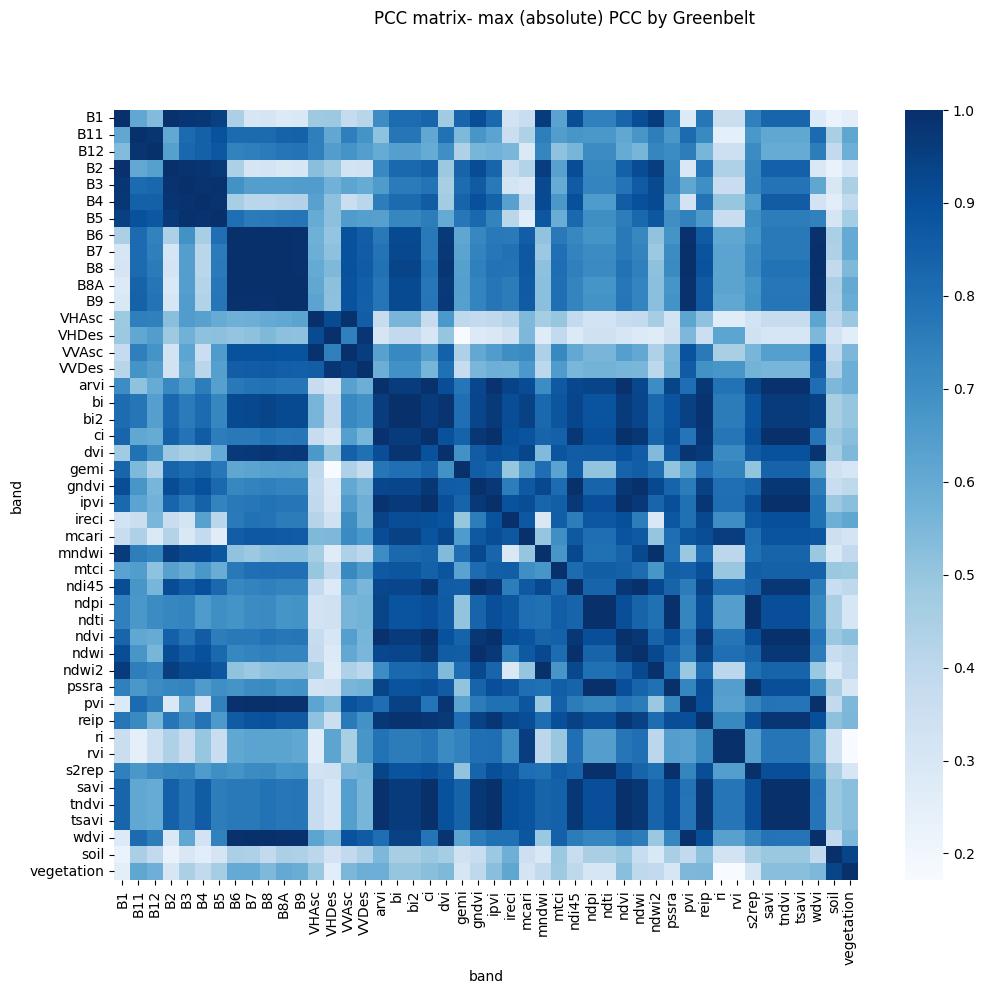

In [51]:

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cor_mat_max.abs(), cmap="Blues", ax=ax)
fig.suptitle("PCC matrix- max (absolute) PCC by Greenbelt")

save_figure(fig, DIR_REPORT_FIGS, "appendix_00_full_pcc_matrix_max")

PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/appendix_00_full_pps_matrix_mean.png')

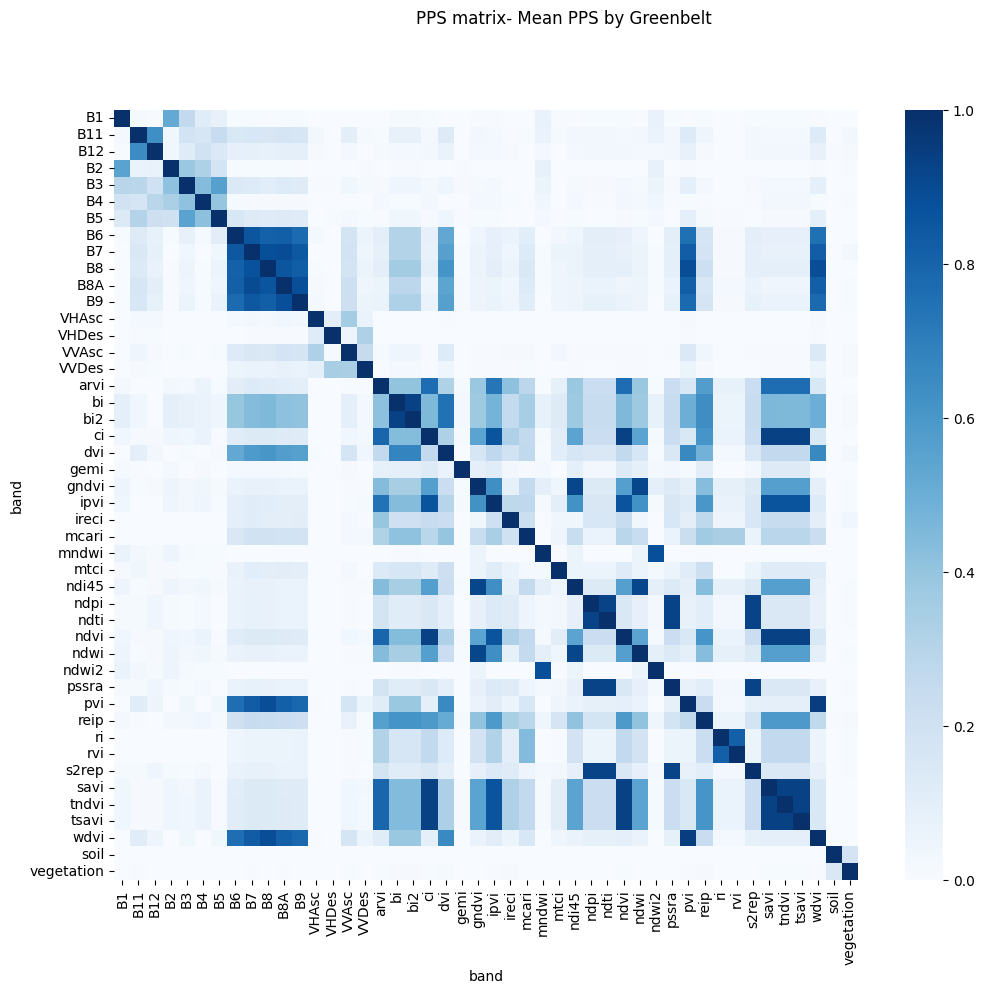

In [52]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pps_mat_mean, cmap="Blues", ax=ax)
fig.suptitle("PPS matrix- Mean PPS by Greenbelt")

save_figure(fig, DIR_REPORT_FIGS, "appendix_00_full_pps_matrix_mean")

PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/appendix_00_full_pps_matrix_max.png')

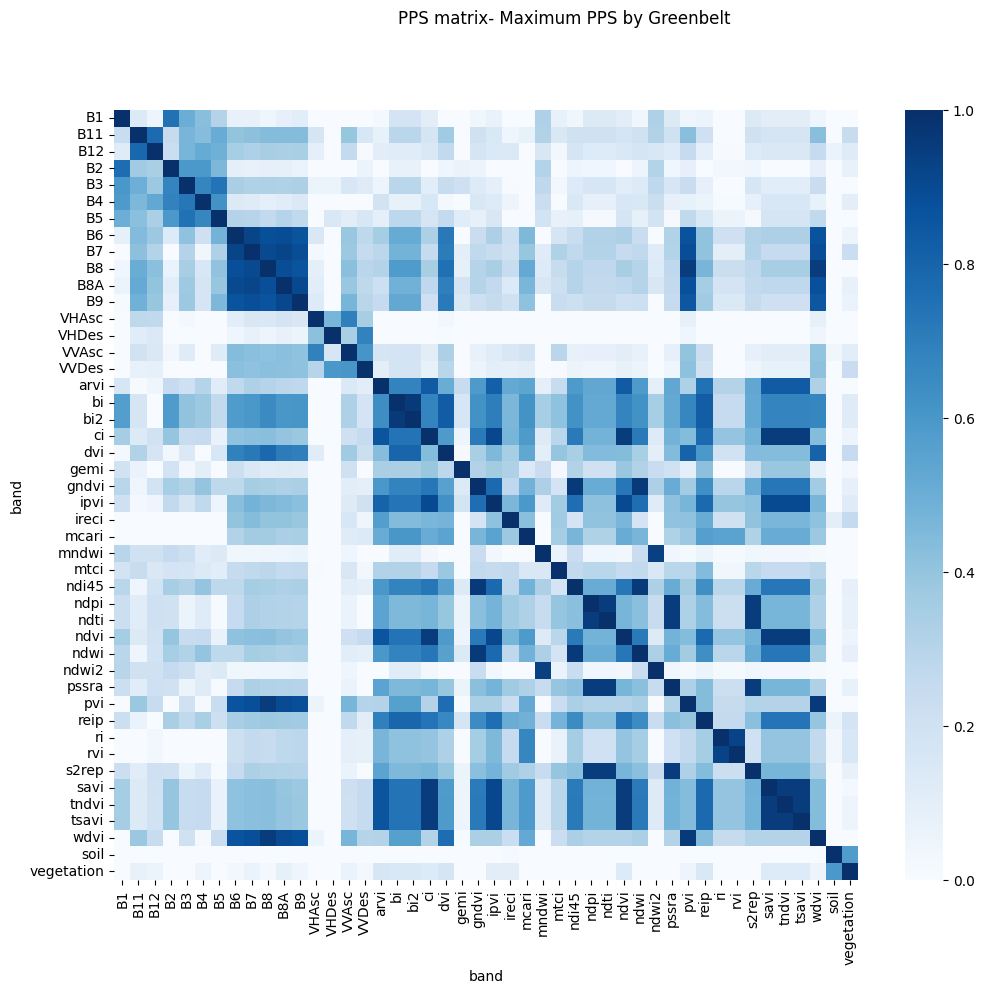

In [53]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pps_mat_max, cmap="Blues", ax=ax)
fig.suptitle("PPS matrix- Maximum PPS by Greenbelt")

save_figure(fig, DIR_REPORT_FIGS, "appendix_00_full_pps_matrix_max")


In [67]:
INDEX_NAMES = list(common_cols)
INDEX_NAMES = [i for i in INDEX_NAMES if i not in ["soil", "vegetation"]]
index_pps_mean = pps_mat_mean.loc[INDEX_NAMES, ["soil", "vegetation"]].T
index_pps_max = pps_mat_max.loc[INDEX_NAMES, ["soil", "vegetation"]].T

index_cor_mean = cor_mat_mean.loc[INDEX_NAMES, ["soil", "vegetation"]].T
index_cor_max = cor_mat_max.loc[INDEX_NAMES, ["soil", "vegetation"]].T

PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/pcc_restricted_heatmap_mean.png')

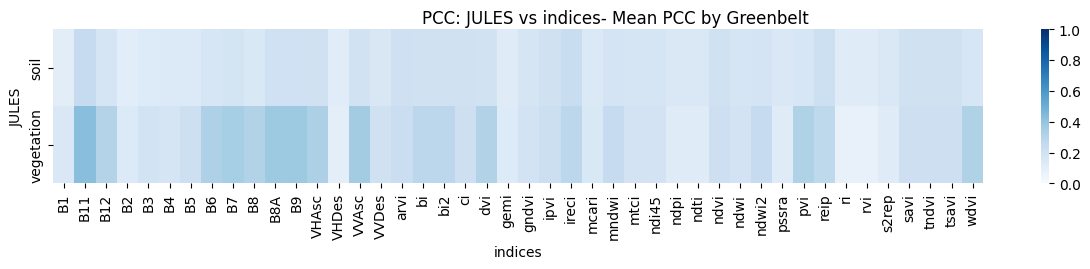

In [68]:
fig, ax = plt.subplots(figsize=[15, 2])
sns.heatmap(index_cor_mean, ax=ax, cmap="Blues", vmin=0., vmax=1.)
fig.suptitle("PCC for indio")
fig.suptitle("PCC: JULES vs indices- Mean PCC by Greenbelt")
ax.set_ylabel("JULES")
ax.set_xlabel("indices")
save_figure(fig, DIR_REPORT_FIGS, "pcc_restricted_heatmap_mean")

PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/pcc_restricted_heatmap_max.png')

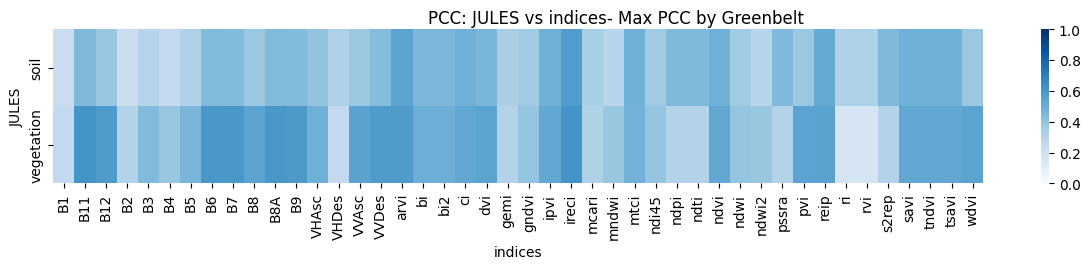

In [69]:
fig, ax = plt.subplots(figsize=[15, 2])
sns.heatmap(index_cor_max, ax=ax, cmap="Blues", vmin=0., vmax=1.)
fig.suptitle("PCC: JULES vs indices- Max PCC by Greenbelt")
ax.set_ylabel("JULES")
ax.set_xlabel("indices")
save_figure(fig, DIR_REPORT_FIGS, "pcc_restricted_heatmap_max")

PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/pps_restricted_heatmap_mean.png')

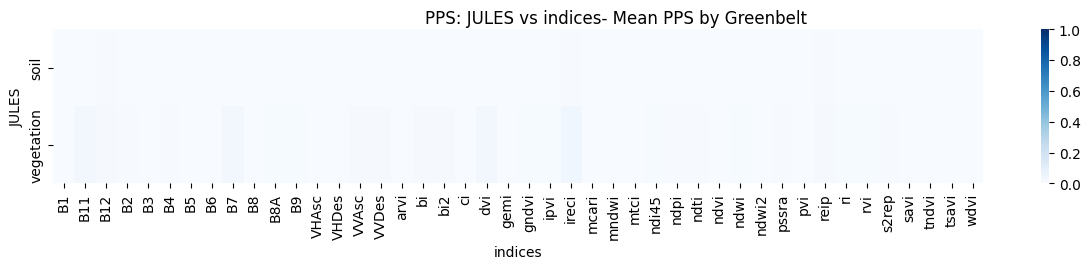

In [70]:
fig, ax = plt.subplots(figsize=[15, 2])
sns.heatmap(index_pps_mean, ax=ax, cmap="Blues", vmin=0., vmax=1.)
fig.suptitle("PPS: JULES vs indices- Mean PPS by Greenbelt")
ax.set_ylabel("JULES")
ax.set_xlabel("indices")
save_figure(fig, DIR_REPORT_FIGS, "pps_restricted_heatmap_mean")

PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/pps_restricted_heatmap_max.png')

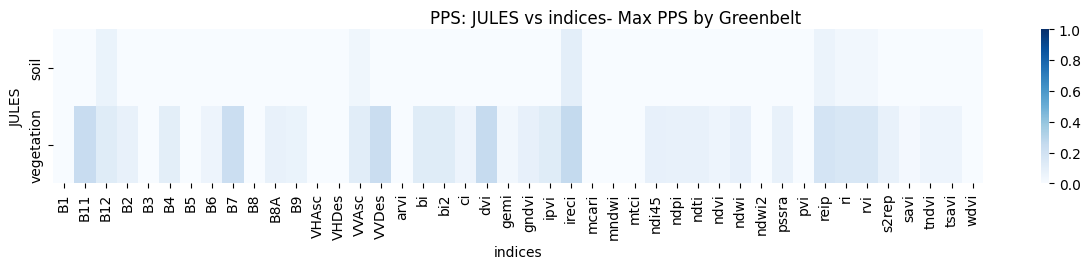

In [71]:

fig, ax = plt.subplots(figsize=[15, 2])
sns.heatmap(index_pps_max, ax=ax, cmap="Blues", vmin=0., vmax=1.)
fig.suptitle("PPS: JULES vs indices- Max PPS by Greenbelt")
ax.set_ylabel("JULES")
ax.set_xlabel("indices")
save_figure(fig, DIR_REPORT_FIGS, "pps_restricted_heatmap_max")

/tmp/ipykernel_350211/4221354990.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  out = pd.concat(cor_mats, axis=0).groupby(axis=0, level=0).apply(lambda x: np.mean(x, axis=0))


PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/Correlations_(PCC)_by_greenbelt_(sorted_high_->_low).png')

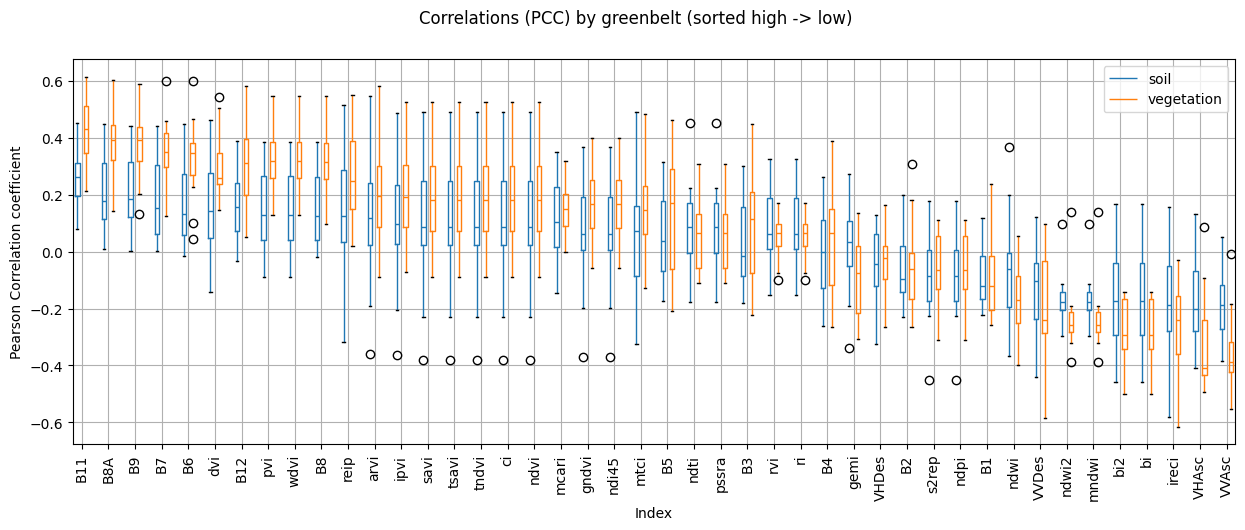

In [77]:
# out = pd.concat(cor_mats, axis=0).groupby(axis=0, level=0).apply(lambda x: np.mean(abs(x), axis=0))
out = pd.concat(cor_mats, axis=0).groupby(axis=0, level=0).apply(lambda x: np.mean(x, axis=0))
out = out.loc[INDEX_NAMES+ ["soil", "vegetation"], INDEX_NAMES+ ["soil", "vegetation"]]
inds = np.argsort(out[["soil", "vegetation"]].sum(axis=1))[::-1].drop(["vegetation", "soil"]).values
names = np.argsort(out[["soil", "vegetation"]].sum(axis=1))[::-1].drop(["vegetation", "soil"]).index
names = out.columns[inds]


fig, ax = plt.subplots(1, figsize=[15, 5])

soil_cov = pd.concat([m[["soil", "vegetation"]] for m in cor_mats], axis=1).T.loc["soil", names]
# soil_cov = pd.concat([m.abs()[["soil", "vegetation"]] for m in cor_mats], axis=1).T.loc["soil", names]
# soil_cov.index = greenbelts
soil_cov.index = list(greenbelts)[1:]
soil_cov.boxplot(ax=ax, 
                 positions=np.arange(0, len(INDEX_NAMES*3), 3),
                 boxprops=dict(color='C0'),
                 medianprops=dict(color='C0'),
                 whiskerprops=dict(color='C0'),
                 label="soil"
                )

# veg_cov = pd.concat([m.abs()[["soil", "vegetation"]] for m in cor_mats], axis=1).T.loc["vegetation", names]
veg_cov = pd.concat([m[["soil", "vegetation"]] for m in cor_mats], axis=1).T.loc["vegetation", names]
# veg_cov.index = greenbelts
veg_cov.index = list(greenbelts)[1:]
veg_cov.boxplot(ax=ax, 
                positions=np.arange(1, len(INDEX_NAMES*3), 3),
                boxprops=dict(color='C1'),
                medianprops=dict(color='C1'),
                whiskerprops=dict(color='C1'),
                label="vegetation"
                )


plt.xticks(rotation=90, labels=names, ticks=np.arange(0, len(INDEX_NAMES*3), 3)+.5);

fig.suptitle("Correlations (PCC) by greenbelt (sorted high -> low)")
ax.set_xlabel("Index")
ax.set_ylabel("Pearson Correlation coefficient")
plt.legend()

save_figure(fig, DIR_REPORT_FIGS, fig.get_suptitle().replace(" ", "_"))

/tmp/ipykernel_350211/2291526729.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  out = pd.concat(pps_mats, axis=0).groupby(axis=0, level=0).apply(lambda x: np.mean(x, axis=0))


PosixPath('/home/finley/Work/RDS/projects/greensight/documents/reports/correlation_reports_droppedna/2025-02-18/figs/Predictive_Power_Score_(PPS)_by_greenbelt_(sorted_high_->_low).png')

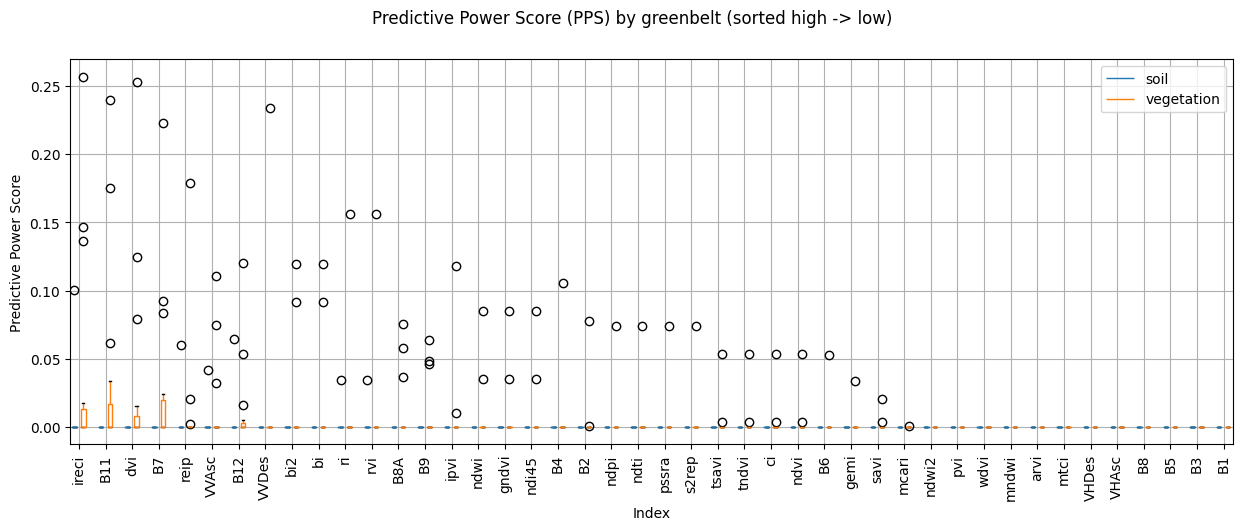

In [78]:
# out = pd.concat(cor_mats, axis=0).groupby(axis=0, level=0).apply(lambda x: np.mean(abs(x), axis=0))
out = pd.concat(pps_mats, axis=0).groupby(axis=0, level=0).apply(lambda x: np.mean(x, axis=0))
out = out.loc[INDEX_NAMES+ ["soil", "vegetation"], INDEX_NAMES+ ["soil", "vegetation"]]
inds = np.argsort(out[["soil", "vegetation"]].sum(axis=1))[::-1].drop(["vegetation", "soil"]).values
names = np.argsort(out[["soil", "vegetation"]].sum(axis=1))[::-1].drop(["vegetation", "soil"]).index
names = out.columns[inds]


fig, ax = plt.subplots(1, figsize=[15, 5])

soil_cov = pd.concat([m[["soil", "vegetation"]] for m in pps_mats], axis=1).T.loc["soil", names]
# soil_cov = pd.concat([m.abs()[["soil", "vegetation"]] for m in pps_mats], axis=1).T.loc["soil", names]
# soil_cov.index = greenbelts
soil_cov.index = list(greenbelts)[1:]
soil_cov.boxplot(ax=ax, 
                 positions=np.arange(0, len(INDEX_NAMES*3), 3),
                 boxprops=dict(color='C0'),
                 medianprops=dict(color='C0'),
                 whiskerprops=dict(color='C0'),
                 label="soil"
                )

# veg_cov = pd.concat([m.abs()[["soil", "vegetation"]] for m in pps_mats], axis=1).T.loc["vegetation", names]
veg_cov = pd.concat([m[["soil", "vegetation"]] for m in pps_mats], axis=1).T.loc["vegetation", names]
# veg_cov.index = greenbelts
veg_cov.index = list(greenbelts)[1:]
veg_cov.boxplot(ax=ax, 
                positions=np.arange(1, len(INDEX_NAMES*3), 3),
                boxprops=dict(color='C1'),
                medianprops=dict(color='C1'),
                whiskerprops=dict(color='C1'),
                label="vegetation"
                )


plt.xticks(rotation=90, labels=names, ticks=np.arange(0, len(INDEX_NAMES*3), 3)+.5);

fig.suptitle("Predictive Power Score (PPS) by greenbelt (sorted high -> low)")
ax.set_xlabel("Index")
ax.set_ylabel("Predictive Power Score")
plt.legend()

save_figure(fig, DIR_REPORT_FIGS, fig.get_suptitle().replace(" ", "_"))

In [454]:
# WDVI
index = "wdvi"

indices = df_interp.xs(index, axis=1, level="band")
soil = df_interp.xs("soil", axis=1, level="band")
vegetation = df_interp.xs("vegetation", axis=1, level="band")

In [456]:
def normalize_array(arr):
    """Normalize a NumPy array to the range [0, 1]."""
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    return (arr - arr_min) / (arr_max - arr_min) if arr_max != arr_min else np.zeros_like(arr)

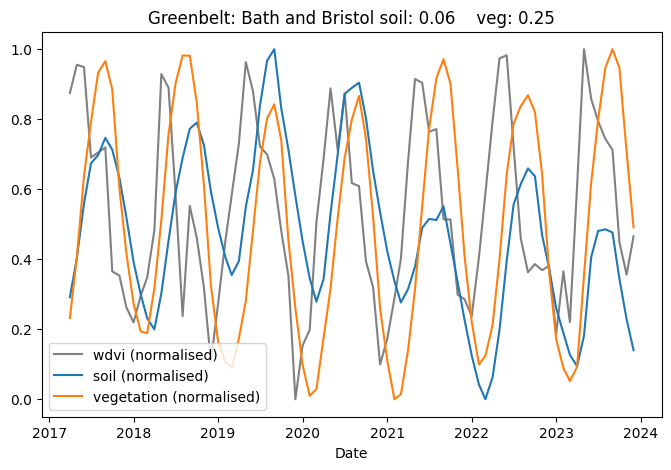

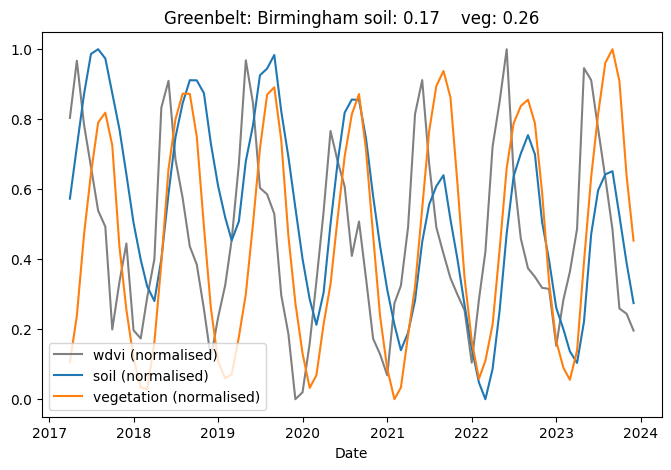

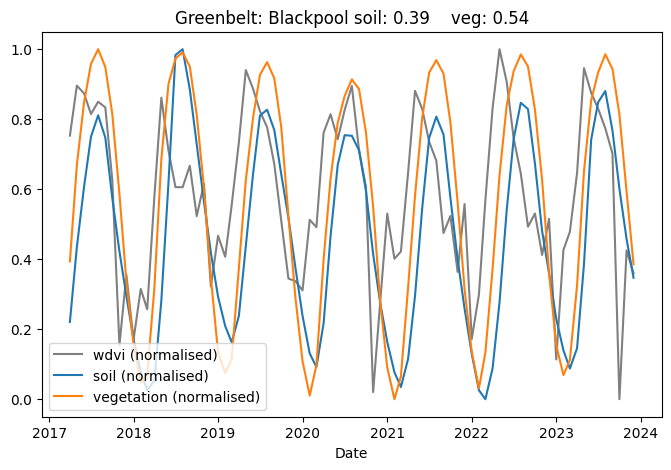

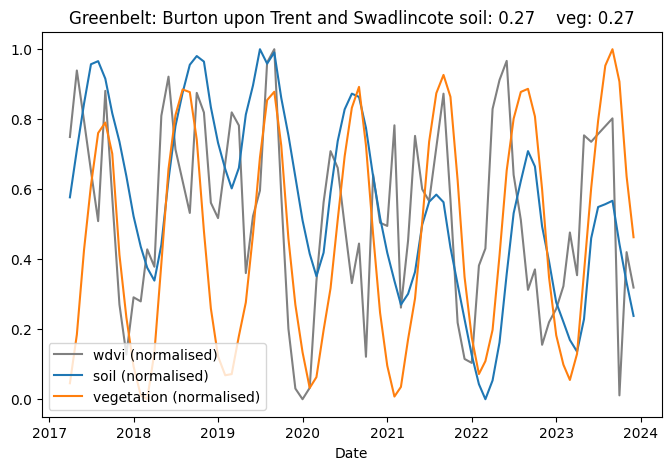

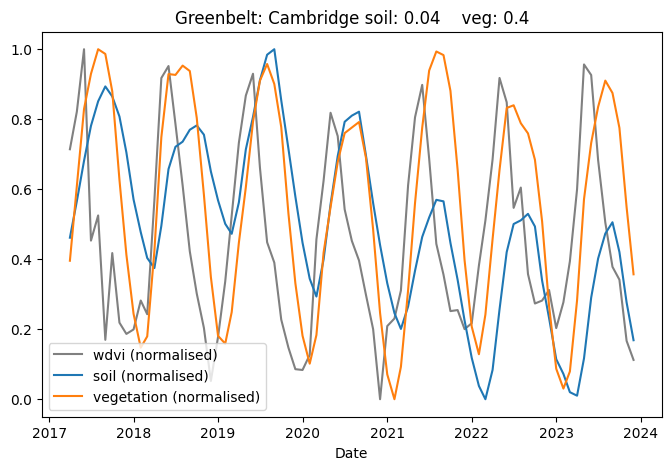

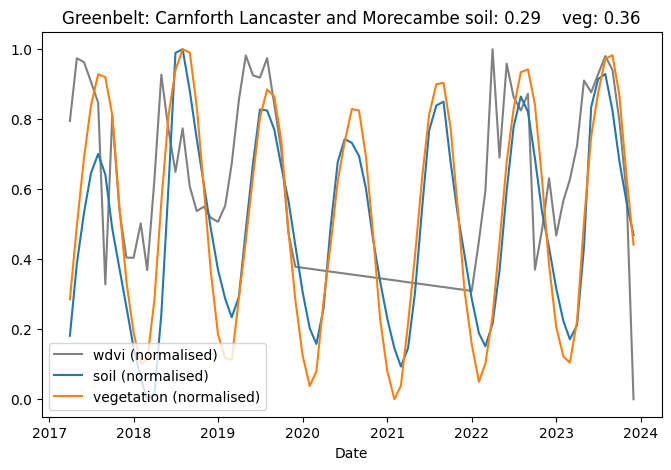

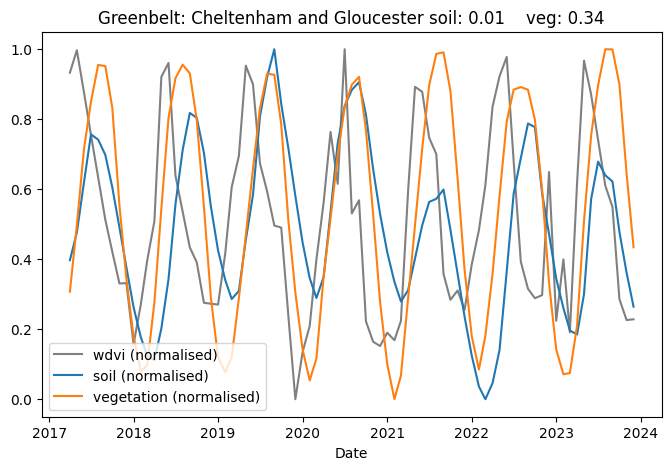

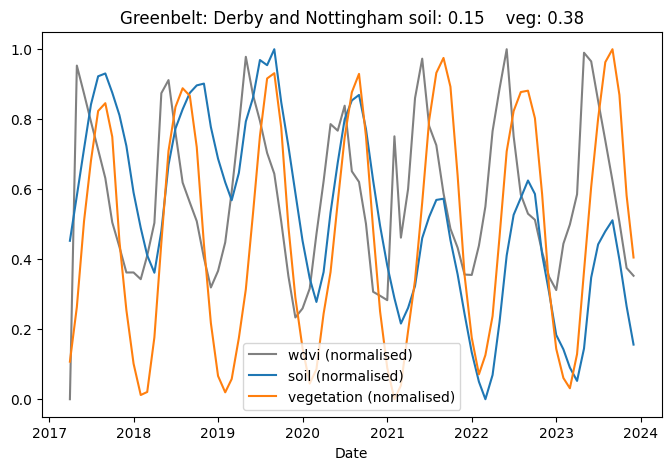

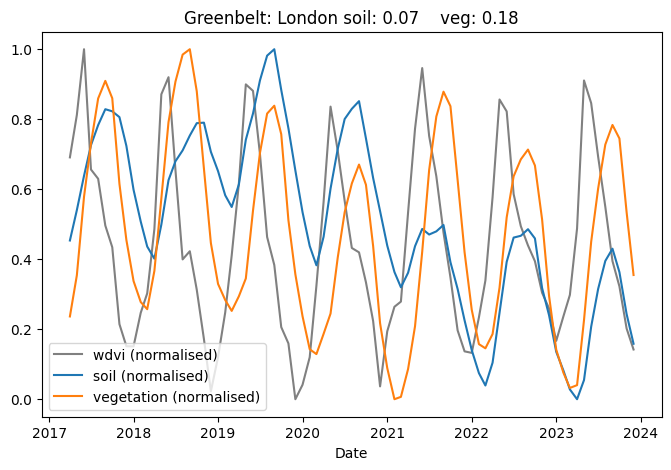

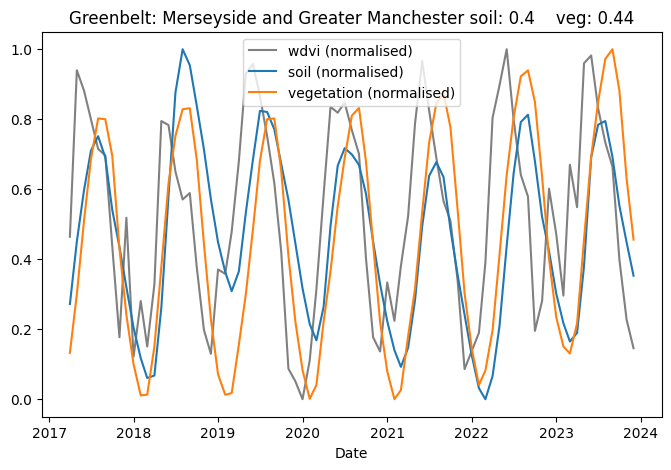

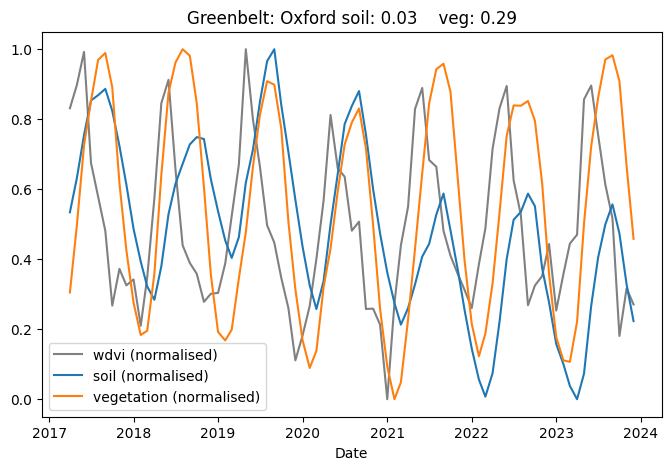

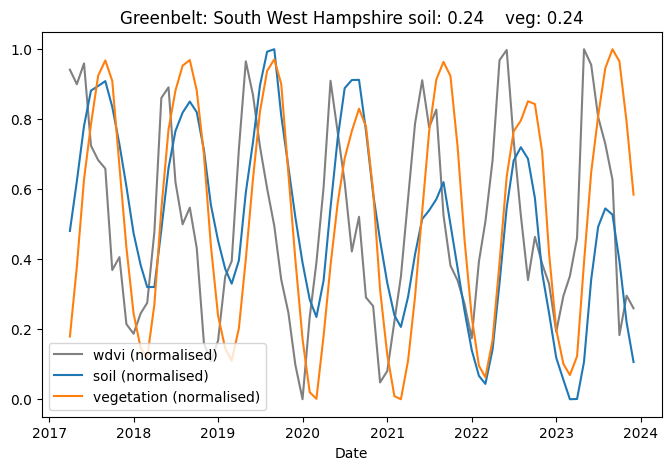

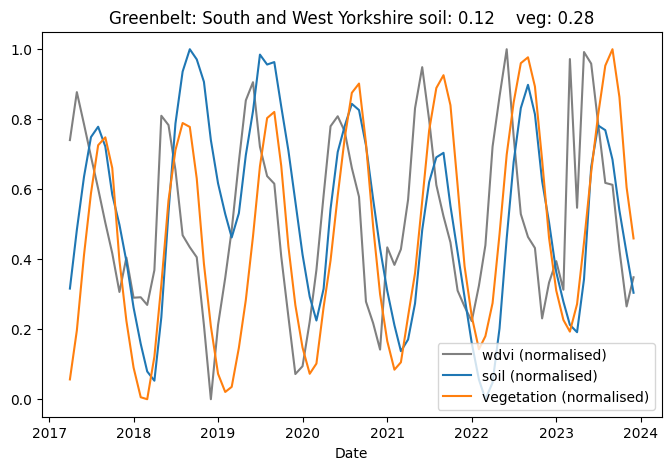

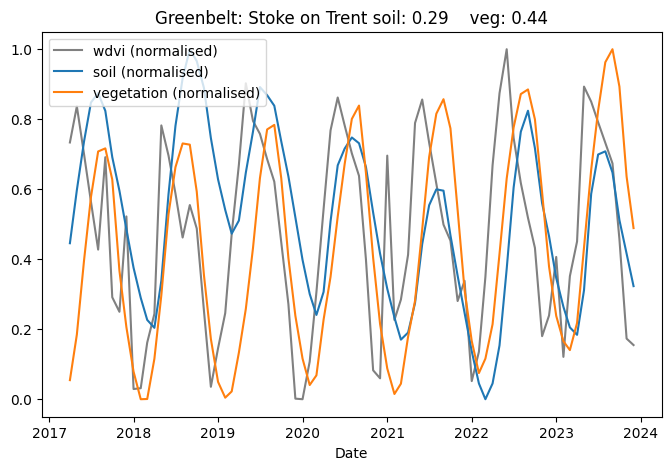

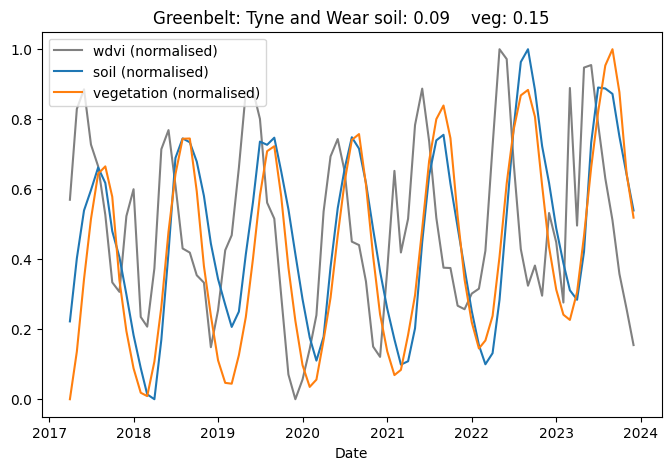

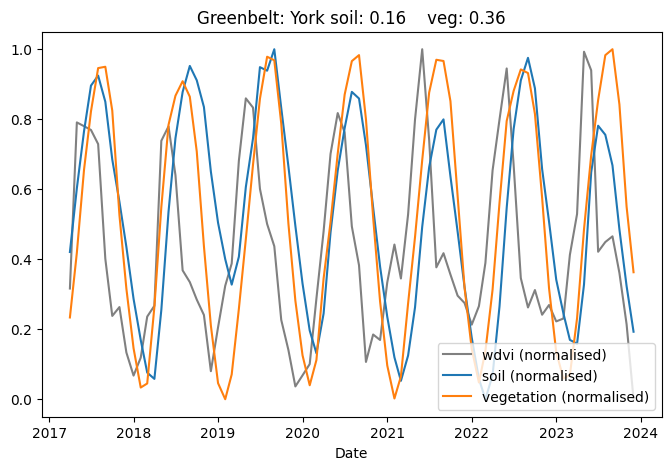

In [465]:

for i, gb in enumerate(indices.columns):
    inds = normalize_array(indices[gb])
    s = normalize_array(soil[gb])
    v = normalize_array(vegetation[gb])
    

    fig, ax = plt.subplots(figsize = [8, 5])
    ax.set_title(f"Greenbelt: {gb} soil: {np.round(np.corrcoef(s, inds)[0, 1], 2)}    veg: {np.round(np.corrcoef(v, inds)[0, 1], 2)}")
    ax.plot(inds, label=index+" (normalised)", c="grey")
    ax.plot(s, c="C0", label="soil (normalised)")
    ax.plot(v, c="C1", label="vegetation (normalised)")
    ax.set_xlabel("Date")

    plt.legend()
    save_figure(fig, DIR_REPORT_FIGS, ax.get_title().replace(" ", "_") + f"_{index}")